In [1]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
ls

drive/  sample_data/


In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading Pickle Files

In [0]:
X_train = pd.read_pickle('drive/My Drive/Assignment-3/trainX.pickle')
X_test = pd.read_pickle('drive/My Drive/Assignment-3/testX.pickle')
y_train = pd.read_pickle('drive/My Drive/Assignment-3/trainY.pickle')

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_train[1,:,:].shape

(28, 28)

# Displaying first 10 images in the training set

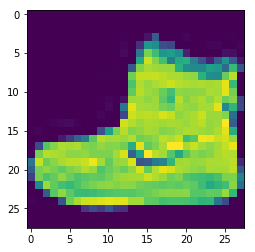

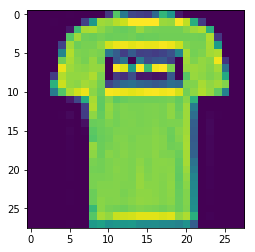

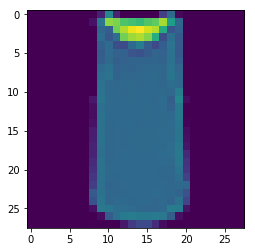

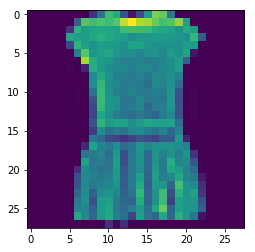

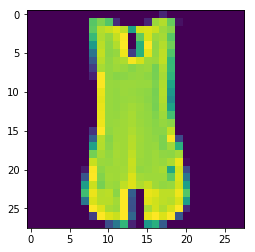

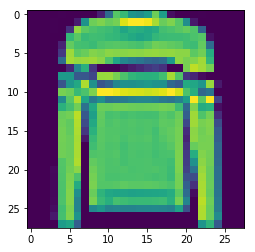

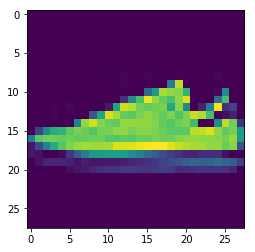

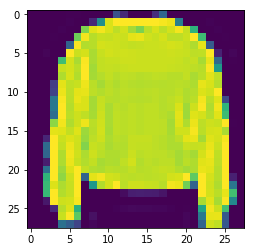

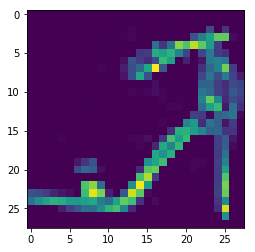

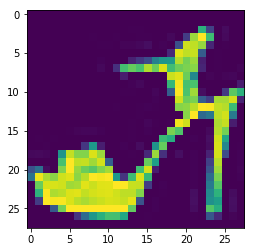

In [7]:
for i in range(10):
    plt.imshow(X_train[i, :, :])
    plt.show()

In [8]:
y_train.shape

(60000,)

In [9]:
max(y_train)

9

In [10]:

min(y_train)

0

# The images in X_train belongs to 10 classes specified in Y_train by a number between 0 to 9

# Reshaping X data for CNN Model

In [0]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))

In [12]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


# As we have to classify images, we should use Convolution Neural Networks

# Splitting the data into training and validation data

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state=42)

In [14]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)

(48000, 28, 28, 1)
(12000, 28, 28, 1)
(48000,)


# Normalising the images

In [0]:
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_train /= 255
X_val /= 255

# Creating a CNN Model

In [16]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Activation, MaxPool2D, Dropout,BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, ReduceLROnPlateau

Using TensorFlow backend.


# Defining our CNN Model

In [17]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(3,3)))
model.add(Dropout(0.35))
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(units = 10, activation = 'softmax'))
model.summary()

W0624 04:02:54.124209 139781561259904 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0624 04:02:54.143095 139781561259904 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0624 04:02:54.145784 139781561259904 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0624 04:02:54.172527 139781561259904 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0624 04:02:54.174808 139781561259904 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 64)          0         
__________

# Plotting the model as a flowchart

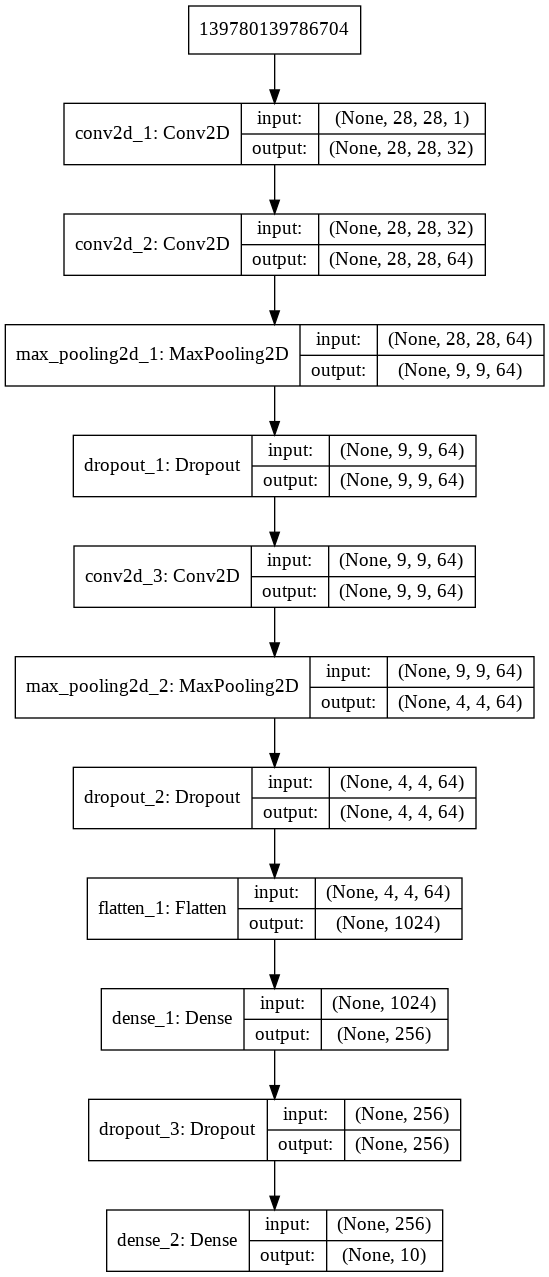

In [18]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, to_file='drive/My Drive/Assignment-3/model.png')
from IPython.display import Image
Image(retina=True, filename='drive/My Drive/Assignment-3/model.png')

# Compiling our model and fitting the data in the model

In [19]:
model.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=256, epochs=50,verbose=1, validation_data=(X_val, y_val))

W0624 04:02:54.459136 139781561259904 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0624 04:02:54.468393 139781561259904 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3341: The name tf.log is deprecated. Please use tf.math.log instead.

W0624 04:02:54.551613 139781561259904 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 7s 149us/step - loss: 0.7696 - acc: 0.7150 - val_loss: 0.4530 - val_acc: 0.8384
Epoch 2/50
48000/48000 [==============================] - 3s 72us/step - loss: 0.4497 - acc: 0.8348 - val_loss: 0.3567 - val_acc: 0.8703
Epoch 3/50
48000/48000 [==============================] - 3s 73us/step - loss: 0.3779 - acc: 0.8617 - val_loss: 0.3104 - val_acc: 0.8863
Epoch 4/50
48000/48000 [==============================] - 4s 73us/step - loss: 0.3397 - acc: 0.8761 - val_loss: 0.2817 - val_acc: 0.8990
Epoch 5/50
48000/48000 [==============================] - 4s 74us/step - loss: 0.3126 - acc: 0.8852 - val_loss: 0.2649 - val_acc: 0.9032
Epoch 6/50
48000/48000 [==============================] - 4s 73us/step - loss: 0.2932 - acc: 0.8910 - val_loss: 0.2555 - val_acc: 0.9062
Epoch 7/50
48000/48000 [==============================] - 4s 73us/step - loss: 0.2807 - acc: 0.8976 - val_loss: 0.2441 - val_ac

# We are getting accuracy of 93.80 using a CNN model

# Plotting the model accuracy and losses graphically

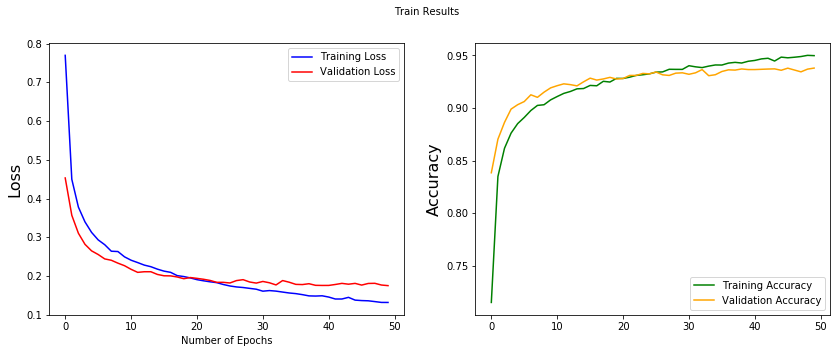

In [20]:
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.suptitle('Train Results', fontsize=10)
plt.xlabel("Number of Epochs")
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['acc'], color='green', label='Training Accuracy')
plt.plot(history.history['val_acc'], color='orange', label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# Predicting the classes of our testing data

In [0]:
y_pred = model.predict_classes(X_test)

In [22]:
y_pred

array([9, 2, 1, ..., 8, 1, 8])

# Writing the predictions to a file

In [0]:
pd.DataFrame(y_pred).to_pickle("drive/My Drive/Assignment-3/predictions.pickle")

# Saving the model weights so that it can be used in future

In [0]:
model.save("drive/My Drive/Assignment-3/myModel.h5")